# Telco Customer Churn

# I. Packages
Reading in the packages needed for the project.

In [1]:
import pandas as pd
import h2o
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import utils as ut
reload(ut)
from IPython.display import display

# set pandas options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 999)

# II. Data Quality Check & Data Preparation

##II.1. Reading in the dataset, setting the data types & renaming columns

In [2]:
# reading in the dataset
df = pd.read_csv('data/telco.csv', sep=',', decimal='.')
# creating customer_id
df["customer_id"] = df.index + 1
print('The dataset has', df.shape[0] , 'rows and', df.shape[1], 'columns.')

The dataset has 1000 rows and 37 columns.


In [3]:
# setting categorical data types
to_cat_vars_list = ['region', 'marital', 'ed', 'retire', 'gender',  'tollfree', 'equip', 'callcard', 'wireless',
                    'multline', 'voice', 'pager','internet', 'callid', 'callwait', 'forward', 'confer', 'ebill',
                    'custcat', 'churn'] 

for cat_var in to_cat_vars_list:
    df[cat_var] = df[cat_var].astype('object')
    

**marital:** I assume that the 'marital' column contains data about the customer's marriage status as it is containing
 flag value.

In [4]:
# renaming the columns so that it would be easier to understand the data included
df.rename(columns={'tenure': 'customer_lifetime_M', 
                   'marital': 'married_flag',
                   'address': 'current_address_years',
                   'income': 'household_income',
                   'ed': 'education_level',
                   'employ': 'current_employment_years',
                   'retire': 'retired_flag',
                   'reside': 'nbr_of_ppl_in_household',
                   'tollfree': 'tollfree_flag',
                   'equip': 'equip_rental_flag',
                   'callcard': 'callcard_flag',
                   'wireless': 'wireless_flag',
                   'longmon': 'long_distance_hours_last_M',
                   'tollmon': 'tollfree_hours_last_M',
                   'equipmon': 'equip_hours_last_M',
                   'cardmon': 'callcard_hours_last_M',
                   'wiremon': 'wireless_hours_last_M' ,
                   'longten': 'long_distance_hours_lifetime',
                   'tollten': 'tollfree_hours_lifetime',
                   'equipten': 'equip_hours_lifetime',
                   'cardten': 'callcard_hours_lifetime',
                   'wireten': 'wireless_hours_lifetime',
                   'multline': 'multiline_flag',
                   'voice': 'voice_flag',
                   'pager': 'pager_flag',
                   'internet': 'internet_flag',
                   'callid': 'caller_id_flag',
                   'callwait': 'call_wait_flag',
                   'forward': 'call_forward_flag',
                   'confer': 'confer_call_flag',
                   'ebill': 'ebill_flag',
                   'custcat': 'customer_cat',
                   'churn': 'churn_flag'
                   }, inplace=True)

In [5]:
# double check names and data types & looking for missing values 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        1000 non-null   object 
 1   customer_lifetime_M           1000 non-null   int64  
 2   age                           1000 non-null   int64  
 3   married_flag                  1000 non-null   object 
 4   current_address_years         1000 non-null   int64  
 5   household_income              1000 non-null   float64
 6   education_level               1000 non-null   object 
 7   current_employment_years      1000 non-null   int64  
 8   retired_flag                  1000 non-null   object 
 9   gender                        1000 non-null   object 
 10  nbr_of_ppl_in_household       1000 non-null   int64  
 11  tollfree_flag                 1000 non-null   object 
 12  equip_rental_flag             1000 non-null   object 
 13  call

There aren't any missing values in the datatset.

In [6]:
# see a small sample from the dataset
df.sample(5)

,region,customer_lifetime_M,age,married_flag,current_address_years,household_income,education_level,current_employment_years,retired_flag,gender,nbr_of_ppl_in_household,tollfree_flag,equip_rental_flag,callcard_flag,wireless_flag,long_distance_hours_last_M,tollfree_hours_last_M,equip_hours_last_M,callcard_hours_last_M,wireless_hours_last_M,long_distance_hours_lifetime,tollfree_hours_lifetime,equip_hours_lifetime,callcard_hours_lifetime,wireless_hours_lifetime,multiline_flag,voice_flag,pager_flag,internet_flag,caller_id_flag,call_wait_flag,call_forward_flag,confer_call_flag,ebill_flag,customer_cat,churn_flag,customer_id
636,1,62,37,1,10,43.0,4,1,0,1,3,0,1,1,0,9.20,0.0,37.2,18.75,0.0,539.65,0.0,2302.40,1160.0,0.0,1,0,0,0,1,0,0,0,0,2,0,637
455,2,15,54,0,7,62.0,1,11,0,0,1,0,0,0,0,3.15,0.0,0.0,0.00,0.0,54.25,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,456
513,1,38,40,0,15,34.0,2,11,0,1,1,0,1,1,0,4.25,0.0,19.8,7.00,0.0,157.60,0.0,779.65,275.0,0.0,1,0,0,1,0,0,0,0,0,2,0,514
535,3,31,34,0,9,105.0,4,7,0,1,4,0,0,1,0,6.45,0.0,0.0,5.75,0.0,182.35,0.0,0.00,170.0,0.0,0,0,0,0,0,1,0,1,0,3,0,536
656,3,7,49,0,8,36.0,1,0,0,1,1,1,0,1,0,8.85,19.5,0.0,53.25,0.0,77.00,123.3,0.00,325.0,0.0,0,0,0,0,1,1,1,1,0,3,1,657


### II.1. Are there any duplicated rows in the dataset? 

In [7]:
# Select all duplicated rows in the dataset
dupl_list = list(df.columns)
dupl_list.remove('customer_id')

duplicated_df = df[df.duplicated(subset=dupl_list)]
if duplicated_df.empty:
    print("There aren't any duplications in the dataset.")
else:
    print("Duplicated rows in the dataset:")
    print(duplicated_df)
    

There aren't any duplications in the dataset.


## II.2. Looking for logical errors in the dataset
### II.2.1. Looking for inconsistency

Check if there are any inconsistency between flags and related data for the whole customer lifetime/for 
last month, check correlation between the latter two variables.

In [8]:
flag_dict = {'tollfree_flag': ['tollfree_hours_lifetime', 'tollfree_hours_last_M'],
             'equip_rental_flag': ['equip_hours_lifetime', 'equip_hours_last_M'],
             'callcard_flag': ['callcard_hours_lifetime', 'callcard_hours_last_M'],
             'wireless_flag': ['wireless_hours_lifetime', 'wireless_hours_last_M']}

for key, value in flag_dict.items():
    print('Variable:', key)
    df_check = df[(df[key] == 1) & ((df[value[0]] == 0)|(df[value[0]] == 0))]
    if df_check.empty is False:
        print(df_check[['customer_id', value[0], value[1]]])
    else:
        print('There is no inconsistency.')
    print(' ')

Variable: tollfree_flag
There is no inconsistency.
 
Variable: equip_rental_flag
There is no inconsistency.
 
Variable: callcard_flag
There is no inconsistency.
 
Variable: wireless_flag
There is no inconsistency.
 


There aren't any inconsistency in the analyzed variables, and there are collerration (as it was expected) between 
lifetime values  and values regarding to last month.

### II.2.2. Is there any customer whose lifetime is bigger than his/her age?

In [9]:
print("Number of rows where customer lifetime (in years) is bigger than the customer's age:", df[df.customer_lifetime_M/12 > df.age].shape[0])

Number of rows where customer lifetime (in years) is bigger than the customer's age: 0


# III. Exploratory Data Analysis (EDA)

### III.1. Correlation between variables
Checking the correlation (with Pearson's correlation coefficient) between each variable and 
eliminating one of the variables from highly correlated variable pairs.

In [10]:
all_vars = list(df.columns)
all_vars.remove('churn_flag')
all_vars.remove('customer_id')

#### III.1.1. Correlation between flags, lifetime and last month variables

In [11]:
for key, value in flag_dict.items():
    vars = value.copy()
    vars.append(key)
    #display(sns.pairplot(df[vars]))
    corr_vars = ut.calc_pearson_correlation(df, vars)
    display(ut.select_by_correlation_threshold(corr_vars, 0.50))
    

,variable_1,variable_2,correlation
1,tollfree_flag,tollfree_hours_lifetime,0.783088
2,tollfree_hours_last_M,tollfree_hours_lifetime,0.726483
3,tollfree_flag,tollfree_hours_last_M,0.718747


,variable_1,variable_2,correlation
1,equip_hours_last_M,equip_hours_lifetime,0.927913
2,equip_rental_flag,equip_hours_lifetime,0.805892
3,equip_rental_flag,equip_hours_last_M,0.784076


,variable_1,variable_2,correlation
1,callcard_flag,callcard_hours_lifetime,0.658178
2,callcard_flag,callcard_hours_last_M,0.632054
3,callcard_hours_last_M,callcard_hours_lifetime,0.580433


,variable_1,variable_2,correlation
1,wireless_hours_last_M,wireless_hours_lifetime,0.967594
2,wireless_flag,wireless_hours_lifetime,0.824703
3,wireless_flag,wireless_hours_last_M,0.817271


In [12]:
# check correlation between long distance variables
# (there were no flags related to this, so we have to analyze them separately)
ld_vars = ['long_distance_hours_lifetime', 'long_distance_hours_last_M']
corr_ld_vars = ut.calc_pearson_correlation(df, ld_vars)
ut.select_by_correlation_threshold(corr_ld_vars, 0.50)

,variable_1,variable_2,correlation


I decided to keep only values regarding to last month as the flag and the monthly values are highly correlated 
with them.

I also decided to drop **long_distance_hours_lifetime** variable as well, as I think that we should use as 
recent data as possible for churn detection problems to get the best results we possibly can.

#### III.1.2. Correlation between all other variables

In [13]:
remove_var_list = ['tollfree_flag','tollfree_hours_lifetime', 'equip_rental_flag', 'equip_hours_lifetime',
                   'callcard_flag', 'callcard_hours_lifetime', 'wireless_flag', 'wireless_hours_lifetime',
                   'long_distance_hours_lifetime']

In [14]:
reduced_vars = all_vars.copy()
for i in remove_var_list:
    reduced_vars.remove(i)

corr_reduced_vars = ut.calc_pearson_correlation(df, reduced_vars)
ut.select_by_correlation_threshold(corr_reduced_vars, 0.50)

,variable_1,variable_2,correlation
1,call_wait_flag,caller_id_flag,0.635605
2,call_forward_flag,caller_id_flag,0.619977
3,call_forward_flag,call_wait_flag,0.619920
4,caller_id_flag,confer_call_flag,0.610598
5,confer_call_flag,call_forward_flag,0.598119
6,call_wait_flag,confer_call_flag,0.582387
7,multiline_flag,customer_cat,0.572141
8,ebill_flag,internet_flag,0.538582
9,pager_flag,wireless_hours_last_M,0.538187
10,voice_flag,pager_flag,0.537861


In [15]:
remove_var_list_2 = ['caller_id_flag', 'call_wait_flag', 'call_forward_flag', 'multiline_flag', 
                     'ebill_flag', 'pager_flag', 'voice_flag']

for i in remove_var_list_2:
    reduced_vars.remove(i)
 

In [16]:
print('Number of reduced variables: ', len(reduced_vars))

Number of reduced variables:  19


#### III.1.3. Visualize correlation between variables

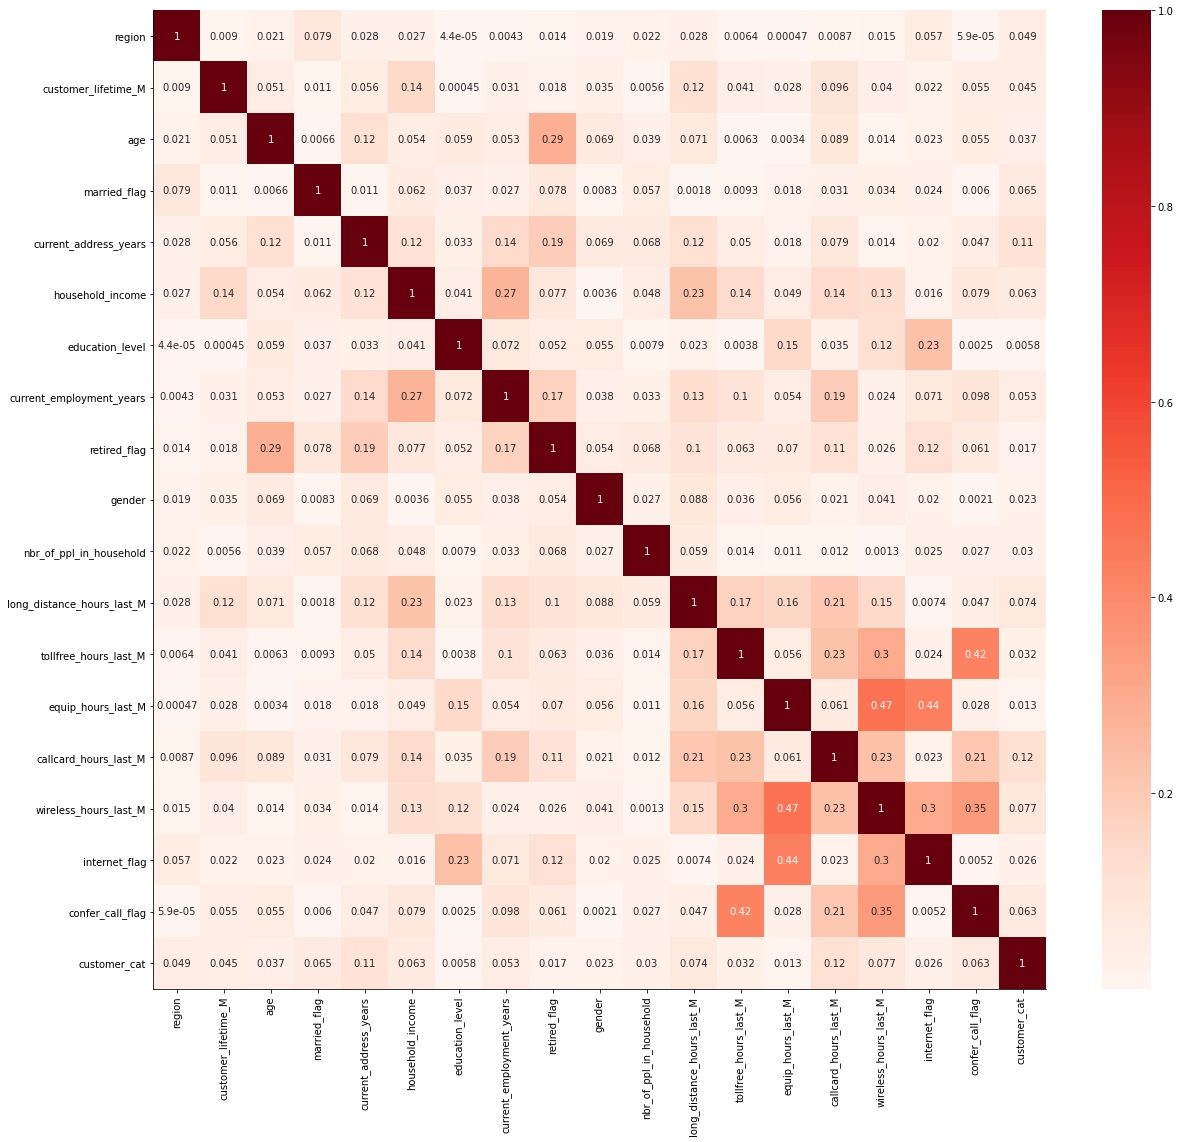

In [17]:
corr_reduced =  ut.calc_pearson_correlation(df, reduced_vars)
hm = sns.heatmap(corr_reduced, annot=True, cmap=plt.cm.Reds) 
sns.despine()
hm.figure.set_size_inches(20, 18)
plt.show()

### III.2. Variable Analysis

In [18]:
num_var_list = list(df[reduced_vars].select_dtypes(include=['float', 'int64']).columns)
cat_var_list = list(df[reduced_vars].select_dtypes(include=['object']).columns)

#### III.2.1 Descriptive Statistics for numerical variables

In [19]:
ut.create_descriptive_stat(df,num_var_list)

,customer_lifetime_M,age,current_address_years,household_income,current_employment_years,nbr_of_ppl_in_household,long_distance_hours_last_M,tollfree_hours_last_M,equip_hours_last_M,callcard_hours_last_M,wireless_hours_last_M
min,1.00,18.00,0.00,9.00,0.00,1.00,0.90,0.00,0.00,0.00,0.00
max,72.00,77.00,55.00,1668.00,47.00,8.00,99.95,173.00,77.70,109.25,111.95
mean,35.53,41.68,11.55,77.54,10.99,2.33,11.72,13.27,14.22,13.78,11.58
mode,72.00,33.00,1.00,25.00,0.00,1.00,4.25,0.00,0.00,0.00,0.00
median,34.00,40.00,9.00,47.00,8.00,2.00,8.52,0.00,0.00,12.00,0.00
10%,7.00,26.00,1.00,21.00,0.00,1.00,3.64,0.00,0.00,0.00,0.00
20%,13.80,30.00,3.00,26.00,2.00,1.00,4.70,0.00,0.00,0.00,0.00
30%,20.00,33.00,4.00,33.00,4.00,1.00,5.88,0.00,0.00,0.00,0.00
40%,26.00,37.00,7.00,39.00,6.00,2.00,7.10,0.00,0.00,9.00,0.00
50%,34.00,40.00,9.00,47.00,8.00,2.00,8.52,0.00,0.00,12.00,0.00


**Key takeaways**
- most of the customers have 6 years of customer lifetime at this company (customer_lifetime_M mode = 72)
- either there are a lot of customers with less than a year of employement at their current workplace or 
missing values for this variable are filled with 0-s
- most of the customers are living alone
- most of the customers are not using the wireless service at all
- less than the half of the customers used
    * rental equipments 
    * tollfree servies
    * call card services
    in the last month.



## III.2.1. Density of churn in categorical variables

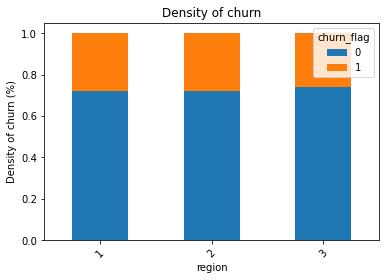

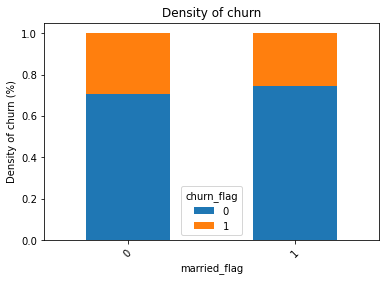

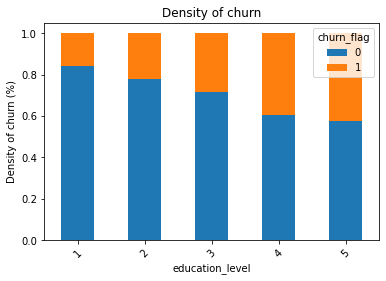

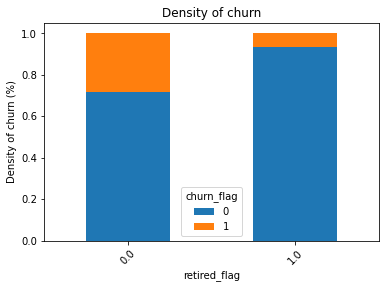

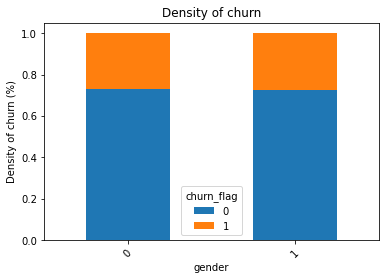

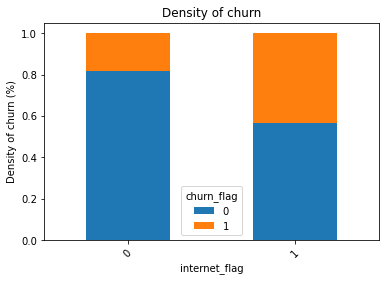

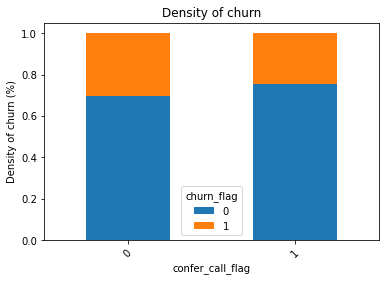

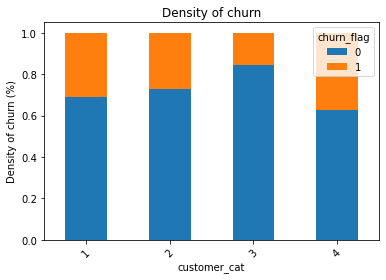

In [21]:
for var in cat_var_list:
    ut.plot_full_stacked_density(df, 'churn_flag', var, 'bar')

**Key takeaways**
At first glance, the following custmers are more likely to churn:
- who have education level 4-5
- who have internet service
- who don't belong to customer category 3

## IV. Variable Selection
Selecting the variables with the highest predictive power.

**Methodology:** <br> 
Building a GBM, a GLM and a DRF model with all potential variables to select the ones with the highest predivtice power based on their variable importances (which is based on forward selection). Selecting the TOP 5 variables from each model's result.

I used these models as there are usually very well on classification problems.

In [22]:
# initalizing h2o 
h2o.init(ip="localhost", port=54323, max_mem_size=1)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from C:\Users\hargi\anaconda3\envs\telco_customer_churn_\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\hargi\AppData\Local\Temp\tmpn4_iu13r
  JVM stdout: C:\Users\hargi\AppData\Local\Temp\tmpn4_iu13r\h2o_hargi_started_from_python.out
  JVM stderr: C:\Users\hargi\AppData\Local\Temp\tmpn4_iu13r\h2o_hargi_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.1.2
H2O cluster version age:,5 months !!!
H2O cluster name:,H2O_from_python_hargi_1omhjx
H2O cluster total nodes:,1
H2O cluster free memory:,1 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [ ]:
target = 'churn_flag'
modelling_vars = reduced_vars.copy()
print('Nbr of all modelling variables: ', len(modelling_vars))

In [43]:
# convert pandas DataFrame to h2o frame
h2o_vars = reduced_vars.copy()
h2o_vars.append(target)
df_h2o = h2o.H2OFrame(df[h2o_vars])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
# convert categorical columns  
for cat_var in cat_var_list:
    df_h2o[cat_var] = df_h2o[cat_var].asfactor()
    
df_h2o[target] = df_h2o[target].asfactor()
# check data types
df_h2o.types

{'region': 'enum',
 'customer_lifetime_M': 'int',
 'age': 'int',
 'married_flag': 'enum',
 'current_address_years': 'int',
 'household_income': 'int',
 'education_level': 'enum',
 'current_employment_years': 'int',
 'retired_flag': 'enum',
 'gender': 'enum',
 'nbr_of_ppl_in_household': 'int',
 'long_distance_hours_last_M': 'real',
 'tollfree_hours_last_M': 'real',
 'equip_hours_last_M': 'real',
 'callcard_hours_last_M': 'real',
 'wireless_hours_last_M': 'real',
 'internet_flag': 'enum',
 'confer_call_flag': 'enum',
 'customer_cat': 'enum',
 'churn_flag': 'enum'}

In [26]:
# splitting data frame into test + train 
train, test = df_h2o.split_frame(ratios=[0.7], seed=1234)

print('Shape of TRAIN:', train.shape) 
print('Shape of TEST:', test.shape) 

### IV.1. Modelling with all variables

Shape of TRAIN: (712, 20)
Shape of TEST: (288, 20)


In [27]:
# set paramaeters for variable selection functions
nfolds = 5
n = 5

#### IV.1. Variable selection
##### IV.1.1. GBM

gbm Model Build progress: |███████████████████████████████████████████████| 100%


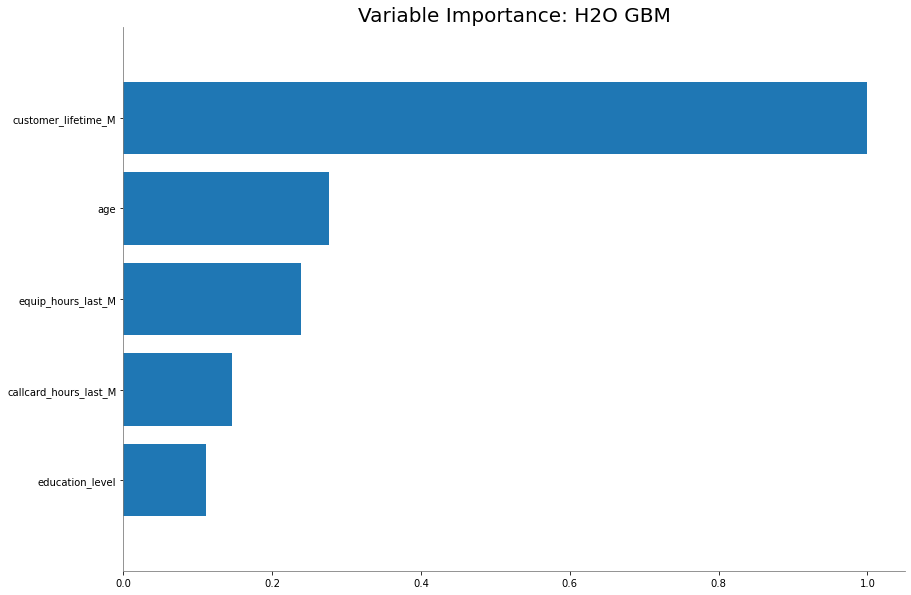

In [28]:
model_gbm_varsel, result_gbm = ut.variable_selection(modelling_vars, target, train, nfolds, n, 'GBM')
# plot variable importance 
model_gbm_varsel.varimp_plot(num_of_features=n)


##### IV.1.2. GLM

glm Model Build progress: |███████████████████████████████████████████████| 100%


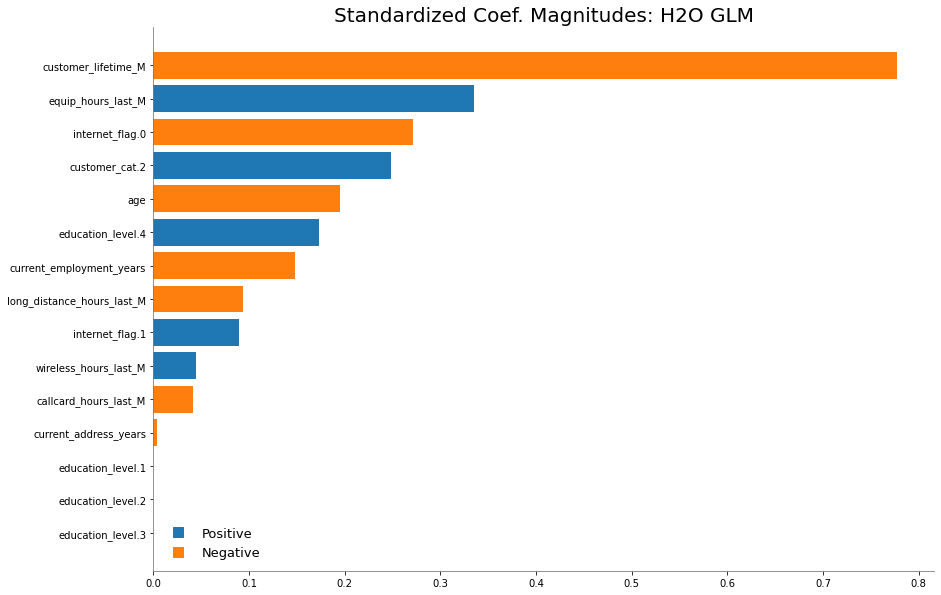

In [29]:
model_glm_varsel, result_glm = ut.variable_selection(modelling_vars, target, train, nfolds, n, 'GLM')
# plot variable importance 
model_glm_varsel.std_coef_plot(num_of_features=n + 10)

##### IV.1.3. DRF

drf Model Build progress: |███████████████████████████████████████████████| 100%


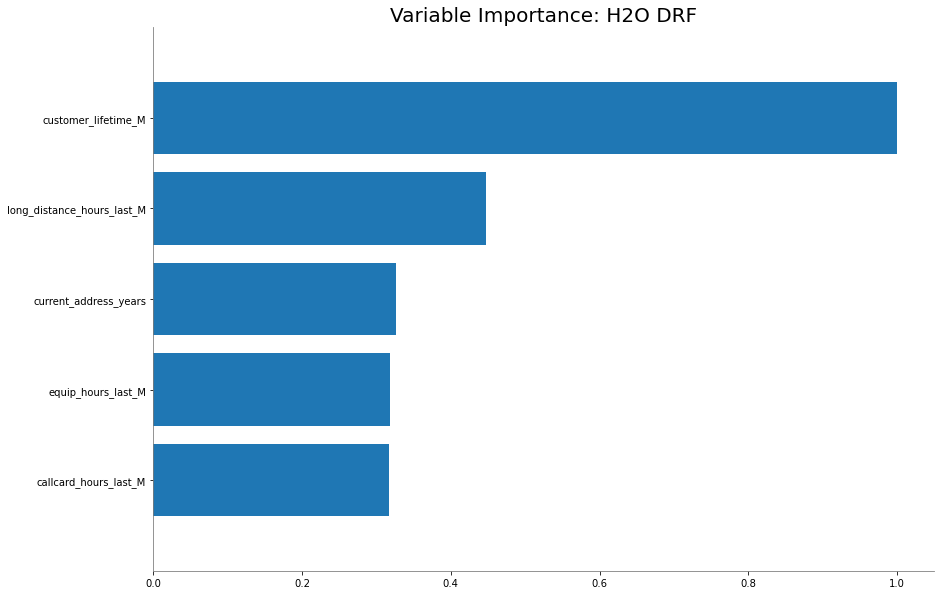

In [30]:
model_drf_varsel, result_drf = ut.variable_selection(modelling_vars, target, train, nfolds, n, 'DRF')
# plot variable importance 
model_drf_varsel.varimp_plot(num_of_features=n)

#### IV.2. Selected Variables

In [31]:
# selected variables
selected = set(result_gbm + result_glm + result_drf)
selected_nbr = len(selected)

print('Nbr of selected variables:' , selected_nbr)
print('Selected variables: ', selected)

Nbr of selected variables: 10
Selected variables:  {'wireless_hours_last_M', 'education_level', 'long_distance_hours_last_M', 'callcard_hours_last_M', 'internet_flag', 'age', 'current_address_years', 'customer_cat', 'equip_hours_last_M', 'customer_lifetime_M'}


### IV.3. Testing selected variables
Testing the model performance with selected variables per each model type. All the modelling parameters are set to default.

In [32]:
model_gbm_test, model_glm_test, model_drf_test = ut.modelling_for_testing_variables(target, selected, train, nfolds)
test_model_list = [model_gbm_test, model_glm_test, model_drf_test]
compare_varsel_df = ut.result_comparison(test_model_list, test, target)
compare_varsel_df


gbm Model Build progress: |████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


,Model,AUC,Customer Nbr,Target Nbr,Cum Capture Rate TOP 10%,Cum Response Rate TOP 10%,Target Found TOP 10%,Cum Capture Rate TOP 20%,Cum Response Rate TOP 20%,Target Found TOP 20%
0,GBM,0.78,288,94,0.20,0.66,18,0.40,0.66,37
1,GLM,0.79,288,94,0.22,0.72,20,0.39,0.64,36
2,DRF,0.76,288,94,0.21,0.59,19,0.44,0.56,41


## V. Parameter Tuning
Based on their AUC values, I decided to tune the GBM's and GLM's hyperparameters with grid search.

**model selection criteria**: The best model should have the highest AUC value on the test set.

### V.1. GBM
**1. Finding the optimal max_depth parameter**

In [33]:
best_gbm_max_depth, gbm_grid_max_depth = ut.gbm_grid_search_max_depth(selected, target, train, test, nfolds)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [34]:
# the result of the grid search 
gbm_grid_max_depth

,,max_depth,auc
0,,3,0.7588972431077694
1,,4,0.7501514202172097
2,,5,0.7379020467836257
3,,6,0.7368786549707602
4,,7,0.7345394736842105
5,,8,0.7286967418546366


**2. Finding all the other optimal hyperparametrs**

In [35]:
# show top 5 models 
show_top = 5 

In [36]:
max_depth = 3
ntrees_list = [25, 50, 100, 150]
min_rows_list = [25, 50, 100, 200]

best_model_gbm, gbm_grid = ut.gbm_grid_search(selected, target, train,  test, nfolds, max_depth, ntrees_list, min_rows_list, show_top)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [37]:
# the results for the TOP 5 models 
gbm_grid

,,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,histogram_type,learn_rate,learn_rate_annealing,min_rows,min_split_improvement,ntrees,sample_rate,auc
0,,0.9,0.4,0.65,QuantilesGlobal,0.35,0.93,200.0,0.001,150,0.6,0.7888836675020886
1,,0.4,1.8,0.7,UniformAdaptive,0.25,0.93,200.0,1.0E-7,100,0.3,0.7886800334168755
2,,0.6,0.75,0.6,Random,0.05,0.99,100.0,1.0E-6,150,0.5,0.7850668337510442
3,,0.4,1.8,0.4,QuantilesGlobal,0.35,0.95,50.0,1.0E-5,150,0.8,0.7841791979949875
4,,0.9,0.65,0.8,Random,0.35,0.9,200.0,1.0E-6,50,0.7,0.7828373015873016


## V.2. GLM

In [38]:
best_model_glm, glm_grid =  ut.glm_grid_search(selected, target, train, test, nfolds, show_top)
# results for the TOP 5 models
glm_grid

glm Grid Build progress: |████████████████████████████████████████████████| 100%


,,alpha,lambda,auc
0,,[0.01],[0.1],0.789280492898914
1,,[0.1],[0.1],0.7863565162907268
2,,[0.01],[0.5],0.7860902255639097
3,,[1.0],[0.001],0.7821794068504595
4,,[0.01],[1.0],0.7819757727652464


## VI. Selecting the BEST model
Finding the model with the best result.

**Methodology:** <br> 
Compare the base line models with the tuned models.

In [39]:
model_list = [model_gbm_test,  best_gbm_max_depth, best_model_gbm, model_glm_test, best_model_glm]
ut.result_comparison(model_list, test, target)

,Model,AUC,Customer Nbr,Target Nbr,Cum Capture Rate TOP 10%,Cum Response Rate TOP 10%,Target Found TOP 10%,Cum Capture Rate TOP 20%,Cum Response Rate TOP 20%,Target Found TOP 20%
0,GBM,0.78,288,94,0.20,0.66,18,0.40,0.66,37
1,best GBM - max_detph,0.78,288,94,0.21,0.69,19,0.39,0.64,36
2,best GBM - grid search,0.79,288,94,0.21,0.67,19,0.40,0.66,37
3,GLM,0.79,288,94,0.22,0.72,20,0.39,0.64,36
4,best GLM - grid search,0.79,288,94,0.22,0.72,20,0.39,0.64,36


The best model is the basline GLM model where we only did not adjust any kind of hyperparamteres. 

- this and the 'best GLM - grid search' (the result of the GLM grid search) have basically the same results, but the other
 model is more complicated than this chosen one, and in these cases we should always choose the simplest model
- With the usage of this model, we can catch
    * the 22% of all churning customers with selecting only the TOP 10% and
    * the 39% with selecting the TOP 20% <br> 
    of the customer base according to the model's scores (for example for campaigns).

The most important variables looks the following (according to variable importance):

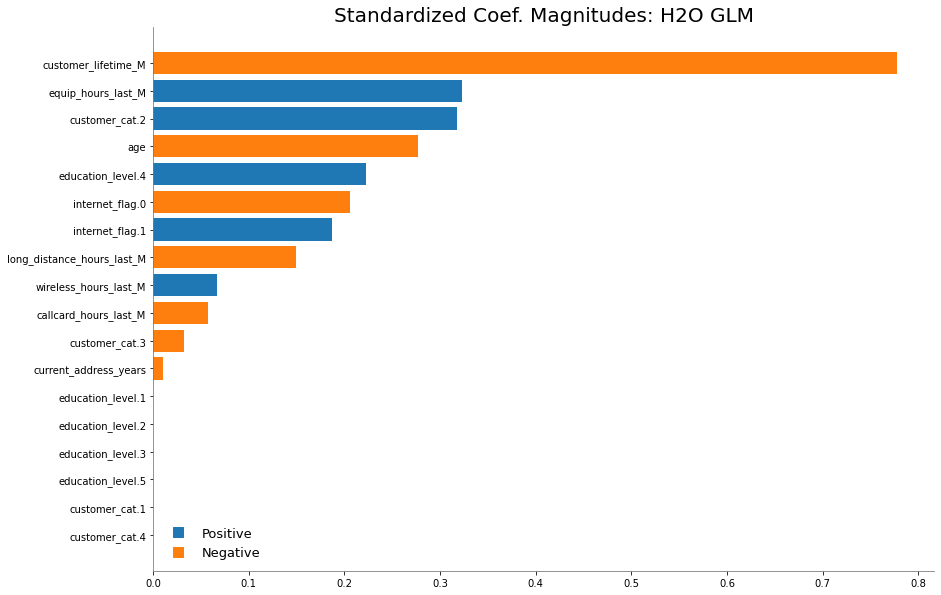

In [40]:
best_model = model_glm_test
best_model.std_coef_plot()

In [41]:
# save the model
h2o.save_model(best_model)

'D:\\Bea\\Projects\\github\\telco_churn\\GLM_model_python_1597687482604_822'

# VII. Proposals for later projects

- it would be really helpful to run a shapley analysis on the finalized variables and model to see
how the values of different variables are impacting the result of the model.
- it would be nice to have more data about the customers:
    * dates
        - so we can create analyis on a monthly basis as well
        - we could take seasonality into consideration
    * usage data
        - general usage
        - were there any day in the last 3 or 6 months when he/she did not use his/her phone/internet service at all?
        - can we see a decreasing tendency in the general usage data?
    * phone usage
        - minutes spoken per day/week/month
    * internet usage
        - Mb internet used per day/week/month
    * social data - data about the most frequent partners
        - how long do they usually speak with each other?
        - who calls who more often?
        - how many times do they speak per week/month?
        - did any of them churn lately?
